In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import json
import imageio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.model_selection import StratifiedKFold

%run ../Scripts/analysisTrajs.py
%run ../Scripts/supMethods.py
foldername = "test1/"

In [15]:
with open(foldername + "params.json") as json_file:
    params = json.load(json_file)
with open(foldername + "sim_params.json") as json_file:
    sim_params = json.load(json_file)

In [ ]:
points = []
for i in range(500, 800, 25):
    n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{i}.npz").todok()
    indexes = get_nonzero_w_repeats(n_i)
    means_gmm, covs_gmm, counts_gmm = fit_unknown_GMM(indexes, n_components = 10, w = 10000)
    means, covs, counts = reduce_GMM(means_gmm, covs_gmm, counts_gmm)
    points.extend(means)

In [127]:
%run ../Scripts/analysisTrajs.py
%run ../Scripts/analysisTrajs2.py

In [129]:
i = 600
n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{i}.npz").todok()
indexes = get_nonzero_w_repeats(n_i)
means_gmm, covs_gmm, counts_gmm = fit_unknown_GMM(indexes, n_components = 10, w = 1000)
means1, covs1, counts1 = reduce_GMM(means_gmm, covs_gmm, counts_gmm)

fig, ax = plt.subplots()
plt.title(f"Gaussian Mixture Model at time {i}")
ax.contour(n_i.toarray().transpose(), cmap = "Reds") #Note that contour is trasnposed
ax.margins(-0.45, -0.45)
colors = generate_colors(len(means1))
for mean , cov, color in zip(means1, covs1, colors):
    ell1 = make_ellipse(mean, cov, color)
    ax.add_patch(ell1)

print("Number of Clusters", len(means1))

Number of Clusters 8


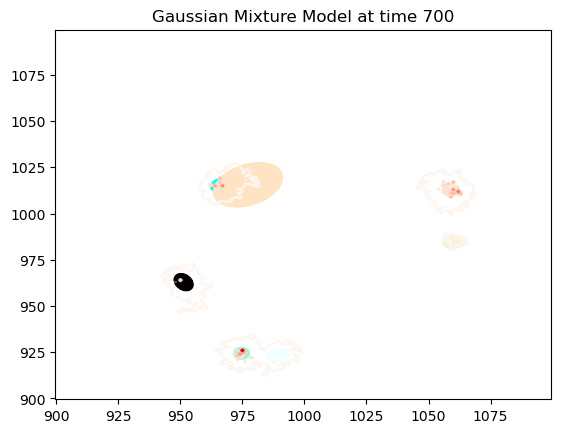

In [128]:
i = 700
n_i = scipy.sparse.load_npz(foldername+f"sp_frame_n{i}.npz").todok()
indexes = get_nonzero_w_repeats(n_i)
means_gmm, covs_gmm, counts_gmm = fit_unknown_GMM(indexes, n_components = 10, w = 0.1)
means2, covs2, counts2 = reduce_GMM(means_gmm, covs_gmm, counts_gmm)

fig, ax = plt.subplots()
plt.title(f"Gaussian Mixture Model at time {i}")
ax.contour(n_i.toarray().transpose(), cmap = "Reds") #Note that contour is trasnposed
ax.margins(-0.45, -0.45)
colors = generate_colors(len(means2))
for mean , cov, color in zip(means2, covs2, colors):
    ell1 = make_ellipse(mean, cov, color)
    ax.add_patch(ell1)

print("Number of Clusters", len(means2))

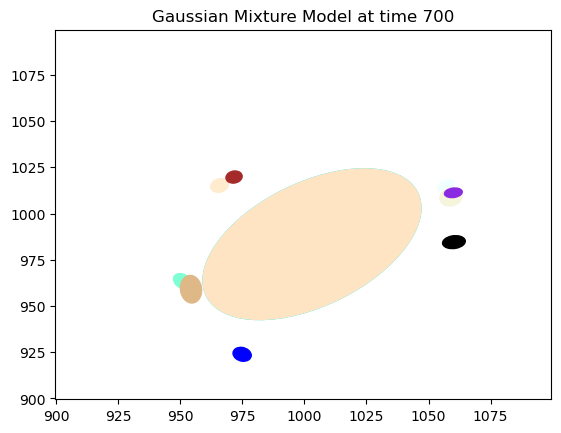

In [126]:
fig, ax = plt.subplots()
plt.title(f"Gaussian Mixture Model at time {i}")
ax.contour(np.zeros(n_i.shape), cmap = "Reds") #Note that contour is trasnposed
ax.margins(-0.45, -0.45)
colors = generate_colors(len(means_gmm))
for mean , cov, color in zip(means_gmm, covs_gmm, colors):
    ell1 = make_ellipse(mean, cov, color)
    ax.add_patch(ell1)